This notebook shows you how to visualize the changes in ozone and particulate matter from different runs of CCTM. Note that you must first run the `combine` program distributed with CMAQ for the files here to exist. The need for postprocessing of CCTM outputs is explained in [this section](https://github.com/USEPA/CMAQ/blob/main/DOCS/Users_Guide/CMAQ_UG_ch08_analysis_tools.md#82-aggregating-and-transforming-model-species) of the CMAQ User's Guide.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from cmaqpy.runcmaq import CMAQModel

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


In [3]:
# Specify the start/end times
start_datetime = 'August 06, 2016'  # first day that you want run
end_datetime = 'August 14, 2016'  # last day you want run
# Define the coordinate name (must match that in GRIDDESC)
coord_name = 'LAM_40N97W'
# Create a CMAQModel object
base_sim = CMAQModel(start_datetime, end_datetime, '2016Base_12OTC2', coord_name, '12OTC2', verbose=True)
s0_sim = CMAQModel(start_datetime, end_datetime, '2016_12OTC2', coord_name, '12OTC2', verbose=True)

Application name: 2016Base_12OTC2
Coordinate name: LAM_40N97W
Grid name: 12OTC2
CCTM RUNID: v533_gcc9.3.1_2016Base_12OTC2
CMAQ run starting on: 2016-08-06 00:00:00
CMAQ run ending on: 2016-08-14 00:00:00
Application name: 2016_12OTC2
Coordinate name: LAM_40N97W
Grid name: 12OTC2
CCTM RUNID: v533_gcc9.3.1_2016_12OTC2
CMAQ run starting on: 2016-08-06 00:00:00
CMAQ run ending on: 2016-08-14 00:00:00


In [4]:
base_sim.cctm_runid

'v533_gcc9.3.1_2016Base_12OTC2'

In [7]:
# Open the output files
aconc_base_df = xr.open_dataset(f'{base_sim.POST}/COMBINE_ACONC_{base_sim.cctm_runid}_201608.nc')
aconc_s0_df = xr.open_dataset(f'{s0_sim.POST}/COMBINE_ACONC_{s0_sim.cctm_runid}_201608.nc')

In [14]:
aconc_base_df

<xarray.Dataset>
Dimensions:        (COL: 273, DATE-TIME: 2, LAY: 1, ROW: 246, TSTEP: 192, VAR: 134)
Dimensions without coordinates: COL, DATE-TIME, LAY, ROW, TSTEP, VAR
Data variables: (12/135)
    TFLAG          (TSTEP, VAR, DATE-TIME) int32 ...
    AIR_DENS       (TSTEP, LAY, ROW, COL) float32 ...
    RH             (TSTEP, LAY, ROW, COL) float32 ...
    SFC_TMP        (TSTEP, LAY, ROW, COL) float32 ...
    PBLH           (TSTEP, LAY, ROW, COL) float32 ...
    SOL_RAD        (TSTEP, LAY, ROW, COL) float32 ...
    ...             ...
    PM25_NO3_loss  (TSTEP, LAY, ROW, COL) float32 ...
    ANO3IJ_loss    (TSTEP, LAY, ROW, COL) float32 ...
    PM25_NH4_loss  (TSTEP, LAY, ROW, COL) float32 ...
    ANH4IJ_loss    (TSTEP, LAY, ROW, COL) float32 ...
    PMIJ_FRM       (TSTEP, LAY, ROW, COL) float32 ...
    PM25_FRM       (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 200 2021-05-10 14:06:20Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022077
    CTIME:          20212
    WDATE:          2022077
    ...             ...
    VGLVLS:         [1.     0.9975]
    GDNAM:          12OTC2          
    UPNAM:          COMBINE         
    VAR-LIST:       AIR_DENS        RH              SFC_TMP         PBLH     ...
    FILEDESC:       Concentration file output                                ...
    HISTORY:

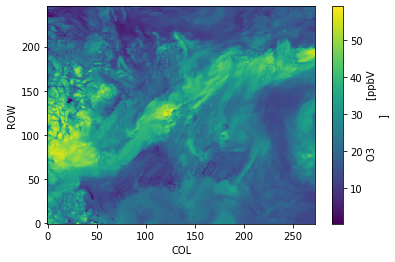

In [15]:
# Visualize the Ozone
aconc_base_df.O3.sel(TSTEP=180).plot()

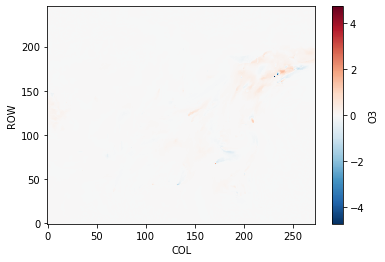

In [16]:
(aconc_s0_df.O3.sel(TSTEP=180) - aconc_base_df.O3.sel(TSTEP=180)).plot()

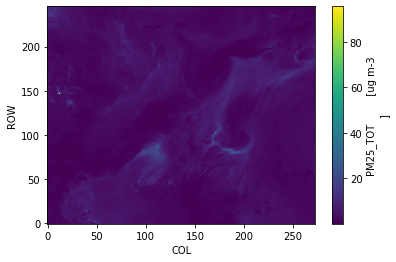

In [20]:
# Visualize the PM25_TOT
aconc_base_df.PM25_TOT.sel(TSTEP=180).plot()

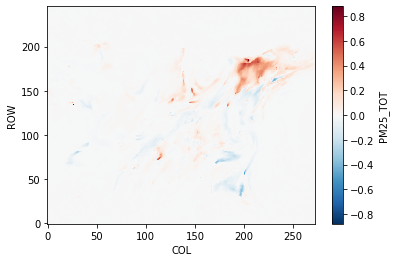

In [21]:
(aconc_s0_df.PM25_TOT.sel(TSTEP=180) - aconc_base_df.PM25_TOT.sel(TSTEP=180)).plot()